In [1]:
# import necesary packages

import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline


In [3]:
# import the .mat data files

mat1 = loadmat('693ffd_compareResponse_block_1.mat',squeeze_me=1)
mat2 = loadmat('693ffd_compareResponse_block_2.mat',squeeze_me=1)
mat3 = loadmat('c19968_compareResponse_block_1.mat',squeeze_me=1)
mat4 = loadmat('c19968_compareResponse_block_2.mat',squeeze_me=1)
mat5 = loadmat('acabb1_compareResponse.mat',squeeze_me=1)
mat6 = loadmat('2fd831_compareResponse_block_1.mat',squeeze_me=1)
mat7 = loadmat('2fd831_compareResponse_block_2.mat',squeeze_me=1)


In [4]:
# extract variables of interest
# respLo = the minimum response time
# respHi = the maximum response time

respLo = mat1['respLo']
respHi = mat1['respHi']
button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']
button3 = mat3['buttonLocs']
button4 = mat4['buttonLocs']
button6 = mat6['buttonLocs']
button7 = mat7['buttonLocs']


In [ ]:
# prepare for pandas data frame

a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}
a= np.arange(0,button3.shape[0])
ndata3 = {n: 1e3*button3[n] for n in a}
a = np.arange(0,button4.shape[0])
ndata4 = {n: 1e3*button4[n] for n in a}
your_keys = {'cort','difference'}
ndata5 = {your_key: mat5[your_key] for your_key in your_keys}
a= np.arange(0,button6.shape[0])
ndata6 = {n: 1e3*button6[n] for n in a}
a = np.arange(0,button7.shape[0])
ndata7 = {n: 1e3*button7[n] for n in a}
ndata6[1] = np.append(ndata6[1],np.nan)
ndata7[1] = np.append(ndata7[1],np.nan)

In [ ]:
# make pandas dataframes

dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')
dataFdict3 = pd.DataFrame.from_dict(ndata3,orient='columns')
dataFdict4 = pd.DataFrame.from_dict(ndata4,orient='columns')
dataFdict_5_1 = pd.DataFrame(ndata5['cort'],columns=['200 ms '])
dataFdict_5_2 = pd.DataFrame(ndata5['difference'],columns=['tactor'])
dataFdict5 = pd.concat([dataFdict_5_1,dataFdict_5_2])
dataFdict6 = pd.DataFrame.from_dict(ndata6,orient='columns')
dataFdict7 = pd.DataFrame.from_dict(ndata7,orient='columns')

In [ ]:
# assign columns for dataframes

dataFdict1.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict2.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict3.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict4.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict6.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict7.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

In [ ]:
dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = '693ffd'
dataMelt1['Subject'] = '3'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = '693ffd'
dataMelt2['Subject'] = '3'
dataMelt2['block'] = '2'
             
dataMelt3 = pd.melt(dataFdict3)
#dataMelt3['Subject'] = 'c19968'
dataMelt3['Subject'] = '2'
dataMelt3['block'] = '1'

dataMelt4 = pd.melt(dataFdict4)
#dataMelt4['Subject'] = 'c19968'
dataMelt4['Subject'] = '2'
dataMelt4['block'] = '2'

dataMelt5 = pd.melt(dataFdict5)
#dataMelt5['Subject'] = 'acabb1'
dataMelt5['Subject'] = '1'
dataMelt5['block'] = '1'

dataMelt6 = pd.melt(dataFdict6)
#dataMelt6['Subject'] = '2fd831'
dataMelt6['Subject'] = '4'
dataMelt6['block'] = '1'
dataMelt7 = pd.melt(dataFdict7)
#dataMelt7['Subject'] = '2fd831'
dataMelt7['Subject'] = '4'
dataMelt7['block'] = '2'

dataMelt1.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt3.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt4.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt5.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)

dataMelt6.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt7.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)


In [5]:
# concatenate 

frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5,dataMelt6,dataMelt7]

result = pd.concat(frames)
result
resultTrim = result[(result['response time (ms)'] < 1000) & (result['response time (ms)'] > 100)]
resultTrim.groupby(['experiment','Subject','block']).mean()

experimentsOfInt = ['tactor','100 ms ','200 ms ','400 ms ', '800 ms ']

dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['experiment','Subject','block']).mean()
dataCleaned.groupby(['experiment','Subject','block']).describe()
dataCleaned.groupby(['experiment','Subject']).describe()
dataCleaned.groupby(['Subject','experiment']).mean()
dataCleaned.groupby(['Subject','experiment']).std()

In [14]:
# get counts of each type

dataCleaned.groupby(['Subject','experiment']).count()

response time (ms)  block
Subject experiment                           
1       200 ms                      85     85
        tactor                      66     66
2       100 ms                      36     36
        200 ms                      40     40
        400 ms                      40     40
        800 ms                      40     40
        tactor                      40     40
3       100 ms                       1      1
        200 ms                      10     10
        400 ms                      25     25
        800 ms                      31     31
        tactor                      39     39
4       100 ms                       3      3
        200 ms                      13     13
        400 ms                      17     17
        800 ms                      22     22
        tactor                      24     24

In [12]:
# set the color palette 

color_pal=sns.choose_colorbrewer_palette('qualitative')

#use set 1

A Jupyter Widget

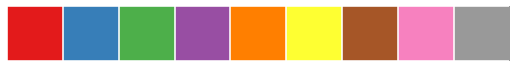

In [13]:
# observe color palette 

sns.palplot(color_pal)
color_pal_3 = color_pal[0:4]
color_pal_2 = color_pal[3:5]
color_pal_2_v2 = color_pal[6:8]

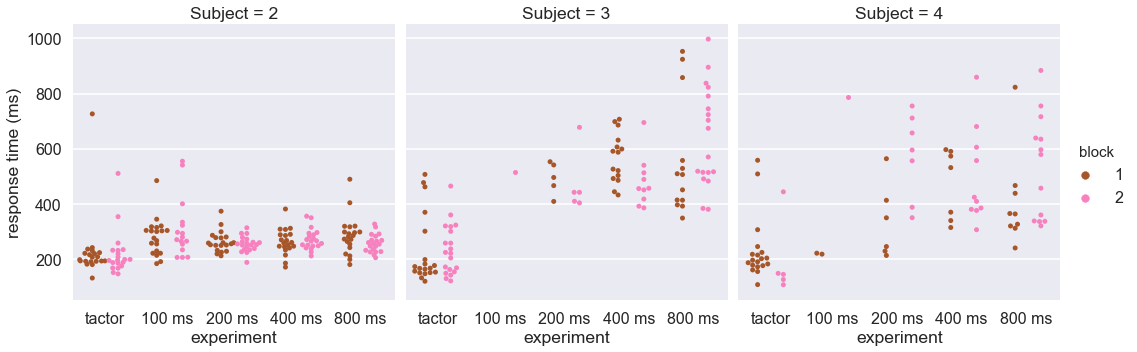

In [15]:
figBlock = sns.factorplot(x="experiment", y="response time (ms)", hue="block",size=5,aspect=1,
...                   col="Subject", data=dataCleaned,kind="swarm",dodge="True",col_order=['2','3','4'],
...                   order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '],
...                   palette=color_pal_2_v2)
#figBlock.savefig('swarmByBlockSplit_subj4.svg', dpi=600)

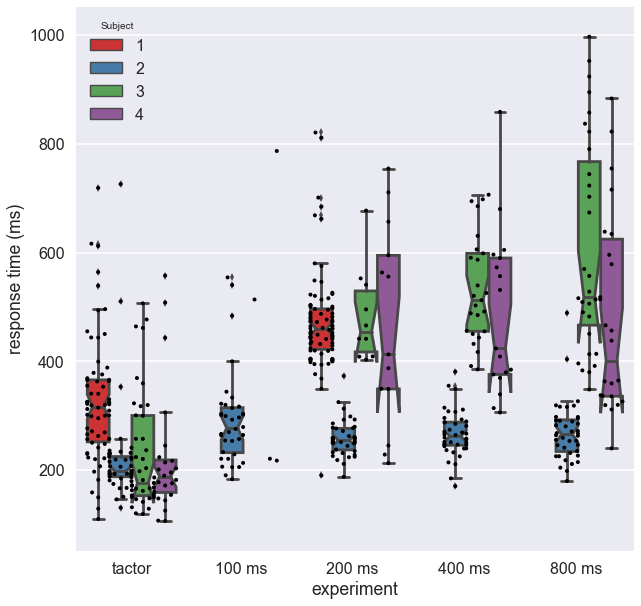

In [91]:
resultTrim_forBox = resultTrim[~(resultTrim['Subject'].isin(['3','4']) & (resultTrim['experiment'].isin(['100 ms '])))]
result[(result['response time (ms)'] < 1000) & (result['response time (ms)'] > 100)]


frameGroup = sns.boxplot(x = 'experiment',y='response time (ms)',notch=True ,hue='Subject',orient="v", data = resultTrim_forBox,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '],palette=color_pal_3)
handles, labels = frameGroup.get_legend_handles_labels()



frameGroup  = sns.swarmplot(x = 'experiment',y='response time (ms)',size=4,hue='Subject',data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
#sns.set_palette
frameGroup .legend_.remove()

frameGroup.legend(handles, labels, loc="upper left", title="Subject")

figGroupBox = plt.gcf()
figGroupBox.set_size_inches(10,10)
#figGroupBox.savefig('swarmAndBoxSID_subj4.svg', dpi=600)
#figGroupBox.savefig('swarmAndBoxSID_subj4.png', dpi=300)

In [1]:
#dataCleaned=dataCleaned.assign(experiment=dataCleaned.experiment.apply(str)).sort_values("experiment",ascending=True)

equiv = {'tactor':'a','100 ms ':'b','200 ms ':'c','400 ms ':'d', '800 ms ':'e'}

dataCleaned['sortCol'] = dataCleaned['experiment'].map(equiv)
#dataCleaned['experiment'] = pd.Categorical(dataCleaned['experiment'], ["tactor","100 ms ","200 ms ","400 ms ", "800 ms "])
dataCleaned=dataCleaned.assign(sortCol=dataCleaned.sortCol.apply(str)).sort_values(["Subject","sortCol"],ascending=[True,True])
dataCleaned

#dataCleaned = dataCleaned.sort('experiment')


typeOrderSort= ['100 ms ','200 ms ','400 ms ', '800 ms ']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.experiment.isin(typeOrderSort))
dataCleaned[dataCleaned['experiment']=='tactor']

NameError: name 'dataCleaned' is not defined

In [94]:
# make data for MATLAB if desired, which is used for the subject comparisons

makeForMat = False

if makeForMat:
    # get it ready for MATLAB
    a_dict = {col_name : dataCleaned[col_name].values for col_name in dataCleaned.columns.values}

    ## optional if you want to save the index as an array as well:
    # a_dict[df.index.name] = df.index.values
    scipy.io.savemat('dataCleaned_4subj.mat', {'struct':a_dict})

    dataCleaned.to_csv('dataCleaned_4subj.csv')

dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.experiment.isin(typeOrderSort),other='1')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.experiment.isin(typeOrderSort),other='0') 

#dataCleaned=dataCleaned.assign(tryThis=dataCleaned.where(dataCleaned.experiment.isin(typeOrder)))

dataCleaned



,experiment,response time (ms),Subject,block,sortCol,typeOrder
275,tactor,159.00672,1,1,a,1
276,tactor,320.10240,1,1,a,1
277,tactor,221.83936,1,1,a,1
278,tactor,450.47808,1,1,a,1
279,tactor,295.56736,1,1,a,1
280,tactor,496.23040,1,1,a,1
281,tactor,399.68768,1,1,a,1
282,tactor,314.94144,1,1,a,1
283,tactor,262.88128,1,1,a,1
284,tactor,340.70528,1,1,a,1


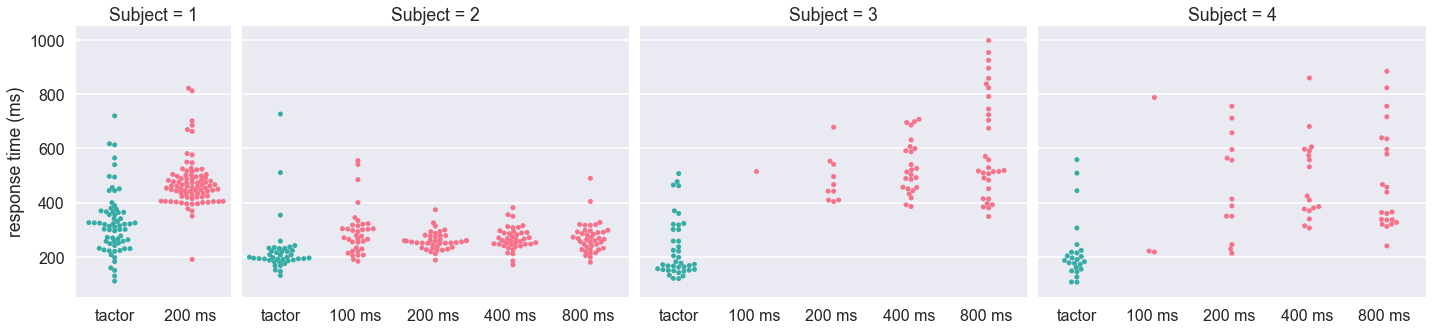

In [101]:


frameIndividual = sns.FacetGrid(data=dataCleaned,col='Subject',size=5, aspect=1,sharex=False,sharey=True,gridspec_kws={"width_ratios": [2, 5, 5, 5]})
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,"experiment","response time (ms)",'typeOrder',palette='husl')
frameIndividual.axes[0,0].set_xlabel('')
frameIndividual.axes[0,1].set_xlabel('')
frameIndividual.axes[0,2].set_xlabel('')
frameIndividual.axes[0,3].set_xlabel('')

#dataCleaned['typeOrder']
figIndividual = plt.gcf()

#figIndividual.savefig('swarmBySid_col_4subj.svg', dpi=600)
#figIndividual.savefig('swarmBySid_col_4subj.png', dpi=600)
